## Assignment-05

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
# 随机生成20个数据，维度为2
random_data = np.random.random((20, 2))
print(random_data)
X = random_data[:, 0]
y = random_data[:, 1]

[[0.75622512 0.89637878]
 [0.24973237 0.66986346]
 [0.94706533 0.50132963]
 [0.28787912 0.34447586]
 [0.86015847 0.77580181]
 [0.82611801 0.63013611]
 [0.78925181 0.4526929 ]
 [0.53798554 0.31557071]
 [0.03630276 0.21239318]
 [0.84389867 0.75624863]
 [0.56007258 0.25636752]
 [0.76689371 0.5095213 ]
 [0.83354466 0.20294651]
 [0.24768046 0.6485293 ]
 [0.17071624 0.64691441]
 [0.36354914 0.84390335]
 [0.13572452 0.4054628 ]
 [0.57665636 0.15122573]
 [0.83465259 0.26184697]
 [0.18601128 0.61084623]]


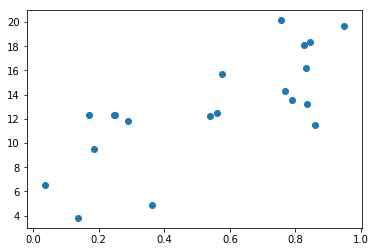

In [7]:
def assuming_function(x):
    return 13.4*x + 5 + random.randint(-5, 5)

y = [assuming_function(x) for x in X]
plt.scatter(X, y)

In [14]:
y = np.array(y)
reg = LinearRegression().fit(X.reshape(-1, 1), y)
print("k:",float(reg.coef_), "b:",reg.intercept_)

def f(x):
    return reg.coef_ * x + reg.intercept_

k: 11.027955522937694 b: 6.982104122834076


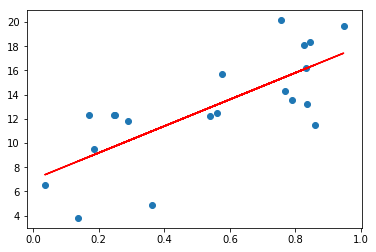

In [15]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

In [16]:
from collections import Counter
from scipy.spatial.distance import cosine

In [17]:
random_data = np.random.random((20, 2))
X = random_data[:, 0]
y = random_data[:, 1]

## y大于0.4为1，小于0.4为0
y = (y >= 0.4)+0

In [25]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]
# print(model(X, y))
def distance(x1, x2):
    return cosine(x1, x2)

def predict(x, k=5):
    # 计算所有点之间的cosine距离并进行排序，取前5个
    most_similars = sorted(model(X, y), key = lambda xi: distance(xi[0], x))[:k]
    # print(most_similars)
    #对点进行分类
    target_list = [x[1] for x in most_similars]
   # print(target_list)
    label = Counter(target_list).most_common()[0][0]
    
    return label

predict(0.3, 3)

0

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

In [64]:
def entropy(elements):
#     print(elements)
    counter = Counter(elements)
#     print(counter)
    probs = [counter[c] / len(elements) for c in set(elements)]
#     print(probs)
    return -sum(p * np.log2(p) for p in probs)

print(entropy([0,0,0,0]),'\n',entropy([1,0]))


-0.0 
 1.0


In [65]:
5/7 * (-2/5*math.log(2/5,2) - 3/5*math.log(3/5,2)) - 2/7*math.log(1,2)

0.6935361388961918

In [66]:
3/7 * (-2/3*math.log(2/3,2) - 1/3*math.log(1/3,2)) + 4/7*(-3/4*math.log(3/4,2) - 1/4*math.log(1/4,2))

0.8571428571428571

In [67]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

dataset = pd.DataFrame.from_dict(mock_data)
print(dataset)

  gender income  family_number  bought
0      F    +10              1       1
1      F    -10              1       1
2      F    +10              2       1
3      F    +10              1       0
4      M    +10              1       0
5      M    +10              1       0
6      M    -10              2       1


In [68]:
# family number为1的五个里面，前两个会买，后三个不买
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()
print(sub_split_1, sub_split_2)
entropy1 = 5/7*entropy(sub_split_1) + 2/7*entropy(sub_split_2)
print(entropy1)

[1, 1, 0, 0, 0] [1, 1]
0.6935361388961918


In [69]:
# gender为M的3个里面，前两个不买，后一个买
_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()
_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist()
print(_sub_split_1, _sub_split_2)
entropy2 = 3/7 * entropy(_sub_split_1) + 4/7*entropy(_sub_split_2)
print(entropy2)

[0, 0, 1] [1, 1, 1, 0]
0.8571428571428571


In [75]:
def find_the_min_spilter(training_data: pd.DataFrame, target: str) -> str:
    # 把target（’bought‘）去掉
    x_fields = set(training_data.columns.tolist()) - {target}
#     print(x_fields)
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        print(f)
        values = set(training_data[f])
        print(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            print('sub_split_1 ',sub_split_1)
            entropy_1 = entropy(sub_spliter_1)
            print('entropy_1 ',entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            print('sub_split_2 ',sub_split_2)
            entropy_2 = entropy(sub_spliter_2)
            print('entropy_2 ',entropy_2)
            a = len(sub_spliter_1)
            b = len(sub_spliter_2)
            entropy_v =  a / (a+b) * entropy_1 + b / (a+b) * entropy_2  # 按比例加和 
            print('entropy_v ',entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

find_the_min_spilter(dataset, 'bought')

income
{'+10', '-10'}
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  0.9709505944546686
sub_split_2  [1, 1]
entropy_2  -0.0
entropy_v  0.6935361388961918
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  -0.0
sub_split_2  [1, 1]
entropy_2  0.9709505944546686
entropy_v  0.6935361388961918
gender
{'F', 'M'}
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  0.8112781244591328
sub_split_2  [1, 1]
entropy_2  0.9182958340544896
entropy_v  0.8571428571428571
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  0.9182958340544896
sub_split_2  [1, 1]
entropy_2  0.8112781244591328
entropy_v  0.8571428571428571
family_number
{1, 2}
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  0.9709505944546686
sub_split_2  [1, 1]
entropy_2  -0.0
entropy_v  0.6935361388961918
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  -0.0
sub_split_2  [1, 1]
entropy_2  0.9709505944546686
entropy_v  0.6935361388961918
spliter is: ('family_number', 2)
the min entropy is: 0.6935361388961918


('family_number', 2)

In [76]:
dataset[dataset['family_number'] == 2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [77]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [78]:
find_the_min_spilter(dataset[dataset['family_number'] == 1], 'bought')

income
{'+10', '-10'}
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  0.8112781244591328
sub_split_2  [1, 1]
entropy_2  -0.0
entropy_v  0.6490224995673063
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  -0.0
sub_split_2  [1, 1]
entropy_2  0.8112781244591328
entropy_v  0.6490224995673063
gender
{'F', 'M'}
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  0.9182958340544896
sub_split_2  [1, 1]
entropy_2  -0.0
entropy_v  0.5509775004326937
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  -0.0
sub_split_2  [1, 1]
entropy_2  0.9182958340544896
entropy_v  0.5509775004326937
family_number
{1}
sub_split_1  [1, 1, 0, 0, 0]
entropy_1  0.9709505944546686
sub_split_2  [1, 1]
entropy_2  0
entropy_v  0.9709505944546686
spliter is: ('gender', 'M')
the min entropy is: 0.5509775004326937


('gender', 'M')

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: 模型是指的解决现实生活问题的一些模型。由于理想状况，数据获取，数据准确率等多方面因素的影响，模型不可能完全正确的发展，知识对问题的尝试性解释。但是有一些模型可以解释一些规律性的，在误差范围内的东西，所以是有用的。

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:欠拟合问题，根本的原因是特征维度过少，导致拟合的函数无法满足训练集，误差较大。

    欠拟合问题可以通过增加特征维度来解决。

    过拟合问题，根本的原因则是特征维度过多，导致拟合的函数完美的经过训练集，但是对新数据的预测结果则较差。

    解决过拟合问题，则有2个途径：

    减少特征维度; 可以人工选择保留的特征，或者模型选择算法
    正则化; 保留所有的特征，通过降低参数θ的值，来影响模型

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans: 这些都是机器学习的评价指标。
     精确率（precision） 描述的是在所有预测出来的正例中有多少是真的正例。召回率（recall），描述的是所有正例可以发现多少，在所有实际为正例的样本中，被预测为正例的样本比例。AUC值是一个概率值，当你随机挑选一个正样本以及一个负样本，当前的分类算法根据计算得到的score值将这个正样本排在负样本前面的概率就是AUC值。F1 F2score值是精确率和召回率的调和均值。

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: 机器学习是一种数据分析技术，让计算机执行人和动物与生俱来的活动：从经验中学习。机器学习算法使用计算方法直接从数据中“学习”信息，而不依赖于预定方程模型。当可用于学习的样本数量增加时，这些算法可自适应提高性能。

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans: 有一定的正确性。评价标准是用来评价机器学习之后得到结果的一些参考指标，会根据应用需求的不同而变化，没有绝对的正确。而在机器学习中遇到的模型，参数，环境等问题也值得我们的重视，并加以解决。

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

    给一个样本要进行预测

In [88]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn import tree
import csv

In [89]:
data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M', 'F'],
    'income': ['1000', '2000', '3000', '4000', '5000', '6000', '7000', '8000'],
    'family_number': [1, 1, 2, 1, 1, 1, 2, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1, 1],
}

dataset1 = pd.DataFrame.from_dict(data)
print(dataset1)
dataset1.to_csv("test.csv")

  gender income  family_number  bought
0      F   1000              1       1
1      F   2000              1       1
2      F   3000              2       1
3      F   4000              1       0
4      M   5000              1       0
5      M   6000              1       0
6      M   7000              2       1
7      F   8000              2       1


In [92]:
data_file = open("test.csv", "r")
reader = csv.reader(data_file)
headers = next(reader)

feature_list = []
label_list = []

for row in reader:
    label_list.append(row[-1])
    row_dict = {}
    for i in range(1, len(row) -1):
        row_dict[ headers[i] ] = row[i]
    feature_list.append(row_dict)
data_file.close()
print(feature_list,'\n')
print(label_list)

[{'gender': 'F', 'income': '1000', 'family_number': '1'}, {'gender': 'F', 'income': '2000', 'family_number': '1'}, {'gender': 'F', 'income': '3000', 'family_number': '2'}, {'gender': 'F', 'income': '4000', 'family_number': '1'}, {'gender': 'M', 'income': '5000', 'family_number': '1'}, {'gender': 'M', 'income': '6000', 'family_number': '1'}, {'gender': 'M', 'income': '7000', 'family_number': '2'}, {'gender': 'F', 'income': '8000', 'family_number': '2'}] 

['1', '1', '1', '0', '0', '0', '1', '1']


In [95]:
# 向量化x, y
vec = DictVectorizer()
dummy_x = vec.fit_transform(feature_list).toarray()
print("dummy_x:", dummy_x)
print("vec.get_feature_names()", vec.get_feature_names())

lb = preprocessing.LabelBinarizer()
dummy_y = lb.fit_transform(label_list)

dummy_x: [[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
vec.get_feature_names() ['family_number=1', 'family_number=2', 'gender=F', 'gender=M', 'income=1000', 'income=2000', 'income=3000', 'income=4000', 'income=5000', 'income=6000', 'income=7000', 'income=8000']


In [100]:
# 构造决策树
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(dummy_x, dummy_y)
print("clf: ", clf)

clf:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [143]:
# 测试数据
def predicate(a, b, c):
    vec_list = [0]*12

    if c == 1:
        vec_list[0] = 1
    elif c == 2:
        vec_list[1] = 1
        
    if a == 'F':
        vec_list[2] = 1
    elif a == 'M':
        vec_list[3] = 1
        
    vec_list[int(b/1000 + 3)] = 1
    print(vec_list)

    predict = clf.predict([vec_list])
    if predict[0] == 0:
        print("no bought") 
    elif predict[0] == 1:
        print("bought") 
predicate('M', 7000, 1)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
no bought


虽然初步完成了feature预测，但是有很大的局限性。在特征的收入部分，只能预测开始设定的1-8k，而且最后的特征向量方法太有问题了。也许扩大数据集会好很多，但是仍然解决不了收入特征的问题。希望老师下次课前可以进行稍稍的讲解。